In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from scipy import stats as st


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
os.getcwd()

'/home/user-1-1120000000167668/work'

In [3]:
calls=pd.read_csv('/datasets/megaline_calls.csv')

In [4]:
internet=pd.read_csv('/datasets/megaline_internet.csv')

In [5]:
messages=pd.read_csv('/datasets/megaline_messages.csv')

In [6]:
tariffs=pd.read_csv('/datasets/megaline_tariffs.csv')

In [7]:
users=pd.read_csv('/datasets/megaline_users.csv')

In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [9]:
calls.isna().mean()

id           0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64

In [10]:
calls.duplicated().sum()

0

In [11]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [12]:
calls['call_date']=pd.to_datetime(calls['call_date'], yearfirst=True)

In [13]:
calls['call_date'].min()

Timestamp('2018-01-15 00:00:00')

In [14]:
calls['call_date'].max()

Timestamp('2018-12-31 00:00:00')

round up call duration minutes as per company policy.

In [15]:
calls['duration']=calls['duration'].apply(np.ceil)

In [16]:
reg_month=calls.groupby(['user_id'])['call_date'].min().reset_index() # month of user registration

In [17]:
calls['month']=calls['call_date'].values.astype('datetime64[M]')

In [18]:
calls_length=calls.groupby(['user_id', 'month'])[['duration']].agg(['sum']).reset_index()

In [19]:
calls_count=calls.groupby(['user_id', 'month'])[['id']].agg(['count']).reset_index()

In [20]:
calls_length.columns=['user_id', 'month', 'duration_sum']

In [21]:
calls_count.columns=['user_id', 'month', 'count_sum']

In [22]:
calls=calls.merge(calls_length, how='left', on=['user_id', 'month'])

In [23]:
calls=calls.merge(calls_count, how='left', on=['user_id', 'month'])

In [24]:
calls.head()

,id,user_id,call_date,duration,month,duration_sum,count_sum
0,1000_93,1000,2018-12-27,9.0,2018-12-01,124.0,16
1,1000_145,1000,2018-12-27,14.0,2018-12-01,124.0,16
2,1000_247,1000,2018-12-27,15.0,2018-12-01,124.0,16
3,1000_309,1000,2018-12-28,6.0,2018-12-01,124.0,16
4,1000_380,1000,2018-12-30,5.0,2018-12-01,124.0,16


In [25]:
calls[calls['duration']==0].count()

id              26834
user_id         26834
call_date       26834
duration        26834
month           26834
duration_sum    26834
count_sum       26834
dtype: int64

In [26]:
calls[calls['duration']==0].count()/len(calls)

id              0.194823
user_id         0.194823
call_date       0.194823
duration        0.194823
month           0.194823
duration_sum    0.194823
count_sum       0.194823
dtype: float64

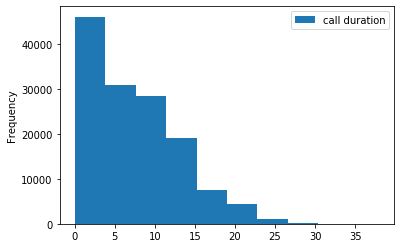

In [27]:
calls['duration'].plot(kind='hist', y='duration', label='call duration', legend=True)

In [28]:
good_calls=calls.query('duration>0.0').copy()

In [29]:
good_calls.describe()

,user_id,duration,duration_sum,count_sum
count,110901.000000,110901.000000,110901.000000,110901.000000
mean,1247.511871,8.875907,555.635810,77.495234
std,139.475249,5.355181,236.106083,32.177004
min,1000.000000,1.000000,2.000000,1.000000
25%,1127.000000,5.000000,401.000000,56.000000
50%,1247.000000,8.000000,526.000000,74.000000
75%,1365.000000,12.000000,678.000000,93.000000
max,1499.000000,38.000000,1510.000000,205.000000


In [30]:
good_calls['duration'].median()

8.0

In [31]:
good_calls['duration'].mean()

8.875907340781417

In [32]:
good_calls['count_sum'].describe()

count    110901.000000
mean         77.495234
std          32.177004
min           1.000000
25%          56.000000
50%          74.000000
75%          93.000000
max         205.000000
Name: count_sum, dtype: float64

In [33]:
good_calls['duration_sum'].describe()

count    110901.000000
mean        555.635810
std         236.106083
min           2.000000
25%         401.000000
50%         526.000000
75%         678.000000
max        1510.000000
Name: duration_sum, dtype: float64

number of calls per month and minutes spent per month

In [34]:
calls.groupby('month')[['duration_sum','count_sum']].agg('sum')

,duration_sum,count_sum
month,,
2018-01-01,42793.0,6170
2018-02-01,390443.0,54546
2018-03-01,729568.0,105712
2018-04-01,1616132.0,224442
2018-05-01,3181794.0,446763
2018-06-01,4235737.0,587649
2018-07-01,6477401.0,903469
2018-08-01,7331542.0,1036826
2018-09-01,8843649.0,1239909


There are 26834 entries with calls' duration of 0.0. This represents about 20% of all data. This is problemmatic givent that almost a quarter of datapoints are empty. When problemmatic entries (duration=0.0) are excluded, the distribution is close to normal with mean=8.88 and median=8 not far apart. The duration of calls range from 1 minute to 37 minute.

In [35]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [36]:
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [37]:
internet['mb_used']=internet['mb_used'].astype(int)

In [38]:
internet['mb_used']=internet['mb_used'].apply(np.ceil) # round up megabytes used as per the company policy

In [39]:
internet.duplicated().sum()

0

In [40]:
internet['session_date']=pd.to_datetime(internet['session_date'], yearfirst=True)

In [41]:
internet['session_date'].min(), internet['session_date'].max()

(Timestamp('2018-01-15 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [42]:
internet['month']=internet['session_date'].values.astype('datetime64[M]')

In [43]:
web_volume=internet.groupby(['user_id', 'month'])[['mb_used']].agg(['count']).reset_index()

In [44]:
web_volume.columns=['user_id', 'month', 'mb_sum']

In [45]:
internet=internet.merge(web_volume, how='left', on=['user_id', 'month'])

In [46]:
internet

,id,user_id,session_date,mb_used,month,mb_sum
0,1000_13,1000,2018-12-29,89.0,2018-12-01,5
1,1000_204,1000,2018-12-31,0.0,2018-12-01,5
2,1000_379,1000,2018-12-28,660.0,2018-12-01,5
3,1000_413,1000,2018-12-26,270.0,2018-12-01,5
4,1000_442,1000,2018-12-27,880.0,2018-12-01,5
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.0,2018-10-01,61
104821,1499_216,1499,2018-12-30,304.0,2018-12-01,65
104822,1499_217,1499,2018-09-22,292.0,2018-09-01,45
104823,1499_218,1499,2018-12-07,0.0,2018-12-01,65


getting rid of null entries

In [47]:
internet[internet['mb_used']==0].count()

id              13829
user_id         13829
session_date    13829
mb_used         13829
month           13829
mb_sum          13829
dtype: int64

In [48]:
internet[internet['mb_used']==0].count()/len(internet)

id              0.131925
user_id         0.131925
session_date    0.131925
mb_used         0.131925
month           0.131925
mb_sum          0.131925
dtype: float64

In [49]:
good_internet=internet.query('mb_used>0.0').copy()

In [50]:
good_internet.head()

,id,user_id,session_date,mb_used,month,mb_sum
0,1000_13,1000,2018-12-29,89.0,2018-12-01,5
2,1000_379,1000,2018-12-28,660.0,2018-12-01,5
3,1000_413,1000,2018-12-26,270.0,2018-12-01,5
4,1000_442,1000,2018-12-27,880.0,2018-12-01,5
5,1001_0,1001,2018-08-24,284.0,2018-08-01,25


In [51]:
internet.isna().mean()

id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
month           0.0
mb_sum          0.0
dtype: float64

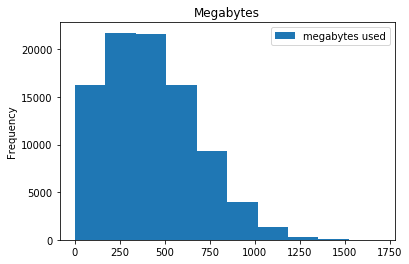

In [52]:
good_internet['mb_used'].plot(kind='hist', y='mb_used', label='megabytes used', legend='true', title='Megabytes')


In [53]:
good_internet['mb_used'].median()

396.0

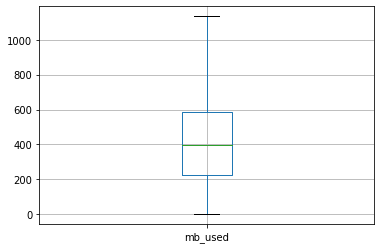

In [54]:
good_internet.boxplot(column='mb_used', showfliers=False)

In [55]:
good_internet.groupby('month')[['mb_sum']].agg('sum')

,mb_sum
month,
2018-01-01,1687
2018-02-01,25094
2018-03-01,61515
2018-04-01,108056
2018-05-01,183476
2018-06-01,260999
2018-07-01,378411
2018-08-01,512583
2018-09-01,575399


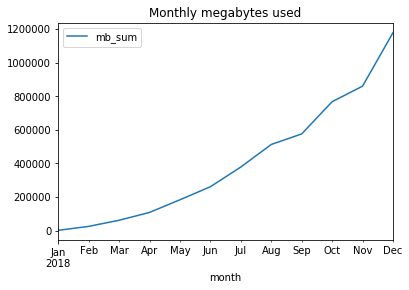

In [56]:
good_internet.groupby('month')[['mb_sum']].agg('sum').plot(kind='line', legend=True, title='Monthly megabytes used')

About 13% of data points in the internet file contain zeroes in the usage column, rendering those values not useful. Without the null values, data indicate that an average internet usage is about 422 mb with a median at 396 mb. The data is skewed to the right wtih 75% of the data at or blow 600 mb mark. Internet usage ranges between 1 mb and 1693 mb.  A number of outliers are located at the high usage rates between 1100 mb and 1700 mbs. The volume of web traffic per month was lowest in January 2018 and inscreased throughout the year with the highest volume in December 2018.
The zero-duration calls and zero megabytes usage is a potential red flag for the data collection team: is it a reporting/recording error or poor connection with dropped signal?

In [57]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [58]:
messages.duplicated().mean()

0.0

In [59]:
messages.isna().mean()

id              0.0
user_id         0.0
message_date    0.0
dtype: float64

In [60]:
messages['message_date']=pd.to_datetime(messages['message_date'], yearfirst=True)

In [61]:
messages['message_date'].min(), messages['message_date'].max()

(Timestamp('2018-01-15 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [62]:
messages['month']=messages['message_date'].values.astype('datetime64[M]')

In [63]:
messages_count=messages.groupby(['user_id', 'month'])['id'].agg(['count']).reset_index()

In [64]:
messages_count.columns=['user_id', 'month','messages_sum']

In [65]:
messages=messages.merge(messages_count, how='left', on=['user_id', 'month'])

In [66]:
messages.describe()

,user_id,messages_sum
count,76051.000000,76051.000000
mean,1245.972768,68.149518
std,139.843635,40.055821
min,1000.000000,1.000000
25%,1123.000000,38.000000
50%,1251.000000,61.000000
75%,1362.000000,88.000000
max,1497.000000,266.000000


In [67]:
messages[messages['user_id']==0]

,id,user_id,message_date,month,messages_sum


In [68]:
messages.groupby('month')[['messages_sum']].agg('sum')

,messages_sum
month,
2018-01-01,2343
2018-02-01,10511
2018-03-01,25100
2018-04-01,60807
2018-05-01,175000
2018-06-01,229827
2018-07-01,318596
2018-08-01,488784
2018-09-01,590161


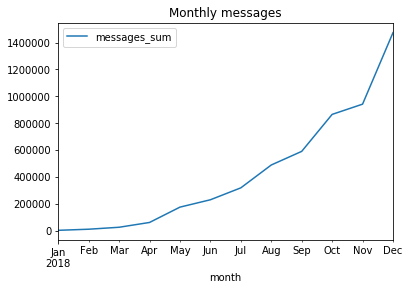

In [69]:
messages.groupby('month')[['messages_sum']].agg('sum').plot(kind='line', legend=True, title='Monthly messages')

There are no null messages recorded in the dataset. No duplicates are found. The number of messages per month grew from january (n=2343) to December (n=1474337).

Task 2: Finding monthly profit per user. Reflected in the column 'monthly_charge'

In [70]:
monthly_web=web_volume.groupby(['user_id', 'month'])['mb_sum'].agg('sum').reset_index()

In [71]:
monthly_web.columns=['user_id', 'month', 'mb_sum']

In [72]:
monthly_web.describe()

,user_id,mb_sum
count,2277.000000,2277.000000
mean,1244.925780,46.036451
std,142.544823,19.275885
min,1000.000000,1.000000
25%,1121.000000,35.000000
50%,1243.000000,48.000000
75%,1367.000000,58.000000
max,1499.000000,138.000000


In [73]:
monthly_messages=messages_count.groupby(['user_id','month'])['messages_sum'].agg('sum').reset_index()
                                        

In [74]:
monthly_messages.columns=['user_id', 'month', 'messages_sum']

In [75]:
length_calls=calls_length.groupby(['user_id', 'month'])['duration_sum'].agg('sum').reset_index()

In [76]:
length_calls.columns=['user_id', 'month','duration_sum']

In [77]:
number_calls=calls_count.groupby(['user_id', 'month'])['count_sum'].agg('sum').reset_index()

In [78]:
number_calls.columns=['user_id', 'month', 'count_sum']

After I've aggregated monthly usage by user, I merge these values with the rest of the user data.

In [79]:
report=monthly_messages.merge(length_calls, how='left', on=['user_id', 'month'])

In [80]:
report=report.merge(number_calls, how='left', on=['user_id', 'month'])

In [81]:
report=report.merge(monthly_web, how='left', on=['user_id', 'month'])

In [82]:
report.head(5)

,user_id,month,messages_sum,duration_sum,count_sum,mb_sum
0,1000,2018-12-01,11,124.0,16.0,5.0
1,1001,2018-08-01,30,182.0,27.0,25.0
2,1001,2018-09-01,44,315.0,49.0,53.0
3,1001,2018-10-01,53,393.0,65.0,56.0
4,1001,2018-11-01,36,426.0,64.0,51.0


In [83]:
tariffs

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [84]:
report=report.merge(users, how='left', on=['user_id'])

In [85]:
report.head(5)

,user_id,month,messages_sum,duration_sum,count_sum,mb_sum,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,2018-12-01,11,124.0,16.0,5.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,2018-08-01,30,182.0,27.0,25.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,2018-09-01,44,315.0,49.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,2018-10-01,53,393.0,65.0,56.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,2018-11-01,36,426.0,64.0,51.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


In [86]:
report=report.merge(tariffs, how='left', left_on='tariff', right_on='tariff_name').copy()

In [87]:
len(report)

1806

In [88]:
report['phone_use']=(report['duration_sum']-report['minutes_included'])

In [89]:
report['minutes_over']=np.where(report.phone_use>0, True, False)  

In [90]:
report['minutes_over']=report['minutes_over'].fillna(0)

In [91]:
report['sms_use']=(report['messages_sum']-report['messages_included'])

In [92]:
report['sms_over']=np.where(report.sms_use>0, True, False)

In [93]:
report['sms_over']=report['sms_over'].fillna(0)

In [94]:
report['web_use']=(report['mb_sum']-report['mb_per_month_included'])

In [95]:
report['web_over']=np.where(report.web_use>0, True, False)

In [96]:
report['web_over']=report['web_over'].fillna(0)

In [97]:
def monthly_profit_phone(report):
    if report['tariff_name']=='ultimate':
        return (report['minutes_over']*report['usd_per_minute'] + report['web_over'] *(report['usd_per_gb']/1000) + report['sms_over']*report['usd_per_message'] + report['usd_monthly_pay'])
    if report['tariff_name']=='surf':
        return (report['minutes_over']*report['usd_per_minute'] + report['web_over']*(report['usd_per_gb']/1000) + report['sms_over']*report['usd_per_message'] + report['usd_monthly_pay'])

report['monthly_charge']=report.apply(monthly_profit_phone, axis=1)

In [98]:
report[report['sms_over']=='True']

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,user_id,month,messages_sum,duration_sum,count_sum,mb_sum,first_name,last_name,age,city,...,usd_per_message,usd_per_minute,tariff_name,phone_use,minutes_over,sms_use,sms_over,web_use,web_over,monthly_charge


In [99]:
report.pivot_table(index='month', columns='tariff_name', values='monthly_charge', aggfunc=['sum','mean', 'max', 'std']).reset_index()

month      sum                mean             max           \
tariff_name                surf ultimate       surf ultimate   surf ultimate   
0           2018-01-01    20.00    210.0  20.000000     70.0  20.00     70.0   
1           2018-02-01   100.06    420.0  20.012000     70.0  20.06     70.0   
2           2018-03-01   320.15    490.0  20.009375     70.0  20.06     70.0   
3           2018-04-01   720.45   1120.0  20.012500     70.0  20.06     70.0   
4           2018-05-01  1121.05   1470.0  20.018750     70.0  20.06     70.0   
5           2018-06-01  1461.20   2660.0  20.016438     70.0  20.06     70.0   
6           2018-07-01  1821.83   3290.0  20.020110     70.0  20.06     70.0   
7           2018-08-01  2482.19   3990.0  20.017661     70.0  20.06     70.0   
8           2018-09-01  3022.67   4970.0  20.017682     70.0  20.06     70.0   
9           2018-10-01  3783.90   6230.0  20.020635     70.0  20.06     70.0   
10          2018-11-01  4524.17   7210.0  20.018451     70.0  20.06     70.0   
11          2018-12-01  5086.09   8820.0  20.023976     70.0  20.06     70.0   

                  std           
tariff_name      surf ultimate  
0                 NaN      0.0  
1            0.026833      0.0  
2            0.018062      0.0  
3            0.019475      0.0  
4            0.020276      0.0  
5            0.020026      0.0  
6            0.020521      0.0  
7            0.020605      0.0  
8            0.020573      0.0  
9            0.021943      0.0  
10           0.020348      0.0  
11           0.021895      0.0

Data show that some clients with surf plans have exceeded phone minutes allottments, but not clients with ultimate plans. Clients have not exceeded prepaid allotments for sms or web usage on either of the plans. 

In [100]:
ultimate=report[report['tariff_name']=='ultimate']

In [101]:
ult_t=ultimate.pivot_table(index='month', values=('duration_sum', 'mb_sum', "messages_sum"), aggfunc=['sum']).reset_index()

In [102]:
report.pivot_table(index='month', columns='tariff_name', values='reg_date', aggfunc='count').reset_index()

tariff_name,month,surf,ultimate
0,2018-01-01,1,3
1,2018-02-01,5,6
2,2018-03-01,16,7
3,2018-04-01,36,16
4,2018-05-01,56,21
5,2018-06-01,73,38
6,2018-07-01,91,47
7,2018-08-01,124,57
8,2018-09-01,151,71
9,2018-10-01,189,89


In [103]:
report.pivot_table(index='month', columns='tariff_name', values='monthly_charge', aggfunc='sum').reset_index()

tariff_name,month,surf,ultimate
0,2018-01-01,20.00,210.0
1,2018-02-01,100.06,420.0
2,2018-03-01,320.15,490.0
3,2018-04-01,720.45,1120.0
4,2018-05-01,1121.05,1470.0
5,2018-06-01,1461.20,2660.0
6,2018-07-01,1821.83,3290.0
7,2018-08-01,2482.19,3990.0
8,2018-09-01,3022.67,4970.0
9,2018-10-01,3783.90,6230.0


In [104]:
report.groupby('tariff_name')['monthly_charge'].sum()

tariff_name
surf        24463.76
ultimate    40880.00
Name: monthly_charge, dtype: float64

surf plan is more popular than the ultimate plan as evidenced by monthly registration numbers. At the same time, ultimate plan has garnered more $$ in terms of monetary value. Total charges per plan reflect that the ultimate plan has brought almost twice as much revenue in monthly charges as did the surf plan. 

In [105]:
ultimate.groupby('month')['duration_sum'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
2018-01-01,3.0,197.666667,157.335099,16.0,151.5,287.0,288.50,290.0
2018-02-01,5.0,486.800000,256.705473,90.0,428.0,519.0,621.00,776.0
2018-03-01,7.0,415.285714,247.672979,39.0,251.0,414.0,620.50,711.0
2018-04-01,16.0,322.750000,202.115643,53.0,203.5,286.0,423.25,746.0
2018-05-01,21.0,410.190476,234.457591,22.0,250.0,369.0,619.00,863.0
2018-06-01,37.0,370.918919,199.175855,45.0,213.0,399.0,474.00,797.0
2018-07-01,47.0,439.638298,284.393055,16.0,202.0,436.0,569.00,1188.0
2018-08-01,57.0,436.438596,243.808035,56.0,253.0,417.0,554.00,1292.0
2018-09-01,71.0,437.591549,252.809560,18.0,231.5,432.0,568.00,1232.0


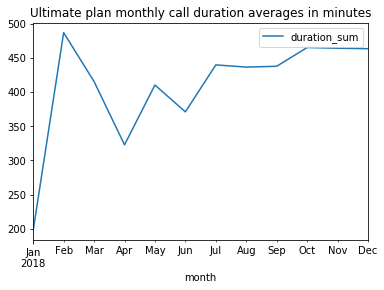

In [106]:
ultimate.groupby('month')['duration_sum'].mean().plot(legend=True, title='Ultimate plan monthly call duration averages in minutes')

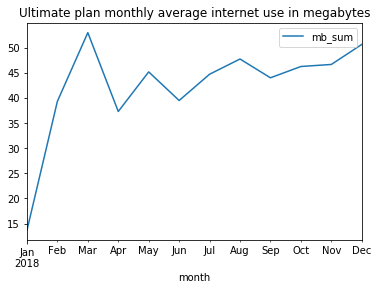

In [107]:
ultimate.groupby('month')['mb_sum'].mean().plot(legend=True, title='Ultimate plan monthly average internet use in megabytes')

customers on the ultimate plan have used a most internet traffic and calls between February and March 2018, There is a slump in usage with a local minimum in April. 

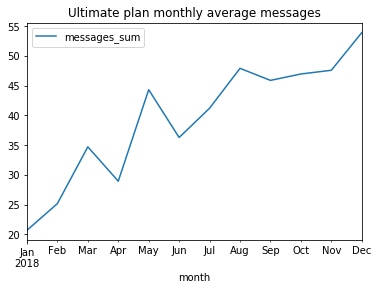

In [108]:
ultimate.groupby('month')['messages_sum'].mean().plot(legend=True, title='Ultimate plan monthly average messages')

Unlike phone calls and internet usage, monthly usage of text messages increased throughout 2018, although the increase is not stedy. There is a dip in April of the usage for all three services pointing to a potential for further investigation of what other factors influenced customers in Apri. 

In [109]:
surf=report[report['tariff_name']=='surf']

In [110]:
surf_t=surf.pivot_table(index='month', values=('duration_sum', 'mb_sum', "messages_sum"), aggfunc=['sum']).reset_index()

In [111]:
surf_t

month          sum                      
              duration_sum   mb_sum messages_sum
0  2018-01-01        292.0     22.0           21
1  2018-02-01       1656.0    139.0          108
2  2018-03-01       5519.0    529.0          351
3  2018-04-01      12862.0   1155.0          870
4  2018-05-01      23771.0   2196.0         1849
5  2018-06-01      30365.0   3049.0         2454
6  2018-07-01      40761.0   4058.0         3271
7  2018-08-01      51543.0   5532.0         4662
8  2018-09-01      63096.0   6803.0         5968
9  2018-10-01      81036.0   8839.0         8020
10 2018-11-01      97452.0  10065.0         9165
11 2018-12-01     122379.0  12608.0        12275

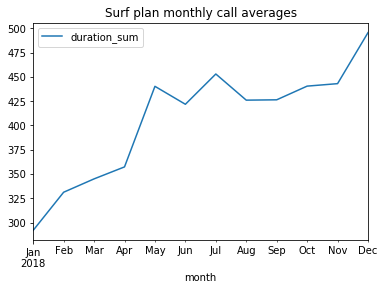

In [112]:
surf.groupby('month')['duration_sum'].mean().plot(legend=True, title="Surf plan monthly call averages")

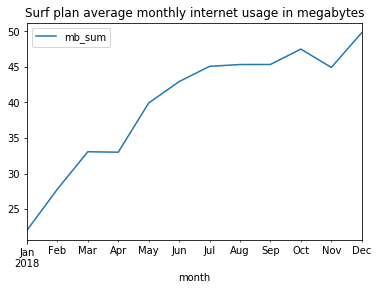

In [113]:
surf.groupby('month')['mb_sum'].mean().plot(legend=True, title='Surf plan average monthly internet usage in megabytes')

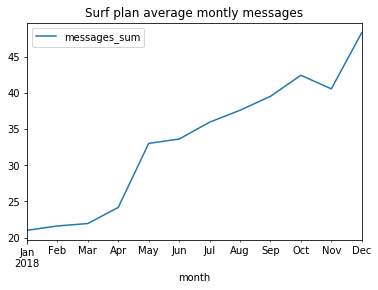

In [114]:
surf.groupby('month')['messages_sum'].mean().plot(legend=True, title='Surf plan average montly messages')

The uptake of texting has been slow for customers on the surf plan. 

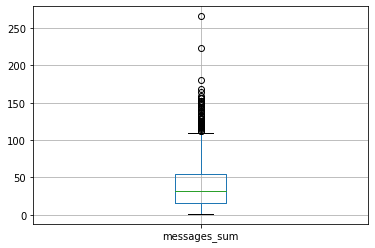

In [115]:
surf.boxplot(column='messages_sum')

In [116]:
report.groupby('month')['reg_date'].count() # count of plan subsribers by month

month
2018-01-01      4
2018-02-01     11
2018-03-01     23
2018-04-01     52
2018-05-01     77
2018-06-01    111
2018-07-01    138
2018-08-01    181
2018-09-01    222
2018-10-01    278
2018-11-01    329
2018-12-01    380
Name: reg_date, dtype: int64

The slow uptake of services in the early months of the year can be explained that registration for plans has been slow in the first 5 months of the year. 

4.Testing the Hypotheses

I chose to run to run a test on the equality of two population means. The null hypothesis is that there is no diference between monthly charges for customers from NY-NJ area and the rest of regions. To isolate the two groups, I first employ a lemmmatizer to locate states from the city column. Then, I run the t-test. The alpha threshold was set at a=0.05.

In [117]:
lemmatizer=WordNetLemmatizer()
def word_lemmatizer(row):
    return[lemmatizer.lemmatize(row, pos='n') for row in nltk.word_tokenize(row)]

report['lemmas']=report['city'].apply(word_lemmatizer)

def lemma_category(row):
    if "NY" in row or "NJ" in row:
        return "NY-NJ"
    return "Other region"

report['city']=report['lemmas'].apply(lemma_category)

In [118]:
new_york=report[report['city']=='NY-NJ']
other=report[report['city']=='Other region']

In [119]:


alpha=0.05

results=st.ttest_ind(
    new_york['monthly_charge'],
    other['monthly_charge'])
print('p-value', results.pvalue)
if (results.pvalue<alpha):
    print('We reject the null hypothesis, there is a difference between NY-NJ and other regions')
else:
    print('We cannot reject the null hypothesis, there is no difference between NY-NJ and other regions')


p-value 0.0008416686168653619
We reject the null hypothesis, there is a difference between NY-NJ and other regions


In [120]:
surf=report[report['tariff_name']=='surf']
ultimate=report[report['tariff_name']=='ultimate']

In [121]:
alpha=0.05

results=st.ttest_ind(
    surf['monthly_charge'],
    ultimate['monthly_charge'])
print('p-value', results.pvalue)
if (results.pvalue<alpha):
    print('We reject the null hypothesis, there is a difference between Surf and Ultimate plans profits')
else:
    print('We cannot reject the null hypothesis, there is no difference plans') 

p-value 0.0
We reject the null hypothesis, there is a difference between Surf and Ultimate plans profits


The results of the t-test indicate that there is a statistically-significant difference in monthly charges between customers from NY-NJ areas and the rest of the regions. Profitability of the Surf and Ultimate plans are statistically different. 

Conclusion: The surf plan is more popular than the ultimate plan. The customers for both plans have not exceeded their pre-paid limits on internet usage and text usage, but customers on the surf plan have gone over the calling limits, although by a small amount on average. In terms of profit, the ultimate plan brought about 40% more revenue than the surf plan. If the cost of providing more minutes and web-traffic for the ultimate plan, as compared with the surf plan, than we can conclude that the ultimate plan is more profitable. 